In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def make_list(row):
    speech_dist = []
    for value in row[1:-1].split('\n '):
        speech_dist.append([int(num) for num in re.findall('[0-9]+', value)])
        
    return speech_dist

In [3]:
def speech_distribution_by_author(author_df):
    all_distributions = []
    for row in author_df['speech_distribution']:
        speech_dist_df = pd.DataFrame(row).T
        # rename columns to make sure they start with 1 and not 0
        speech_dist_df.columns = speech_dist_df.iloc[0, :]
        # no need to include the variants as a row - they will be column names
        only_counts_df = pd.DataFrame(speech_dist_df.iloc[1, :])
        only_counts_df.columns = ['raw_numbers']
        only_counts_df['percentage'] = only_counts_df['raw_numbers'] / only_counts_df.sum().values[0]
        all_distributions.append(round(only_counts_df['percentage'], 4))
    period_df_dist = pd.concat(all_distributions, axis=1).fillna(0)
    # take the mean for each period
    mean_per_type = pd.DataFrame(period_df_dist.mean(axis=1)).T 
    mean_per_type.index.name = 'number_of_speakers'
    mean_per_type = (mean_per_type * 100).round(2)
        
    return mean_per_type

In [4]:
def sigma_iarkho(df):
    """
    The function allows calculating standard range following iarkho's procedure.
    Parameters:
        df  - a dataframe where columns are variants, i.e., the distinct number of speakers in the ascending order, 
              e.g. [1, 2, 3, 4, 5] and values weights corresponding to these variants, i.e.,
              the number of scenes, e.g. [20, 32, 18, 9, 1]
    Returns:
        sigma - standard range per iarkho
    """
    weighted_mean_variants = np.average(df.columns.tolist(), weights=df.values[0])
    differences_squared = [(variant - weighted_mean_variants)**2 for variant in df.columns]
    weighted_mean_difference = np.average(differences_squared, weights=df.values[0])
    sigma = round(weighted_mean_difference**0.5, 2)

    return sigma

In [5]:
contr_data_df = pd.read_csv('../Contrastive_Material/Contrastive_Material_Data.csv')

In [6]:
contr_data_df['speech_distribution'] = contr_data_df['speech_distribution'].apply(make_list)

In [7]:
# sort by date
sorted_contr_data_df = contr_data_df.sort_values(by='date')

In [8]:
sorted_contr_data_df  = sorted_contr_data_df.rename(columns={'num_scenes_iarkho': 'mobility_coefficient', 
                                                           'percentage_non_duologues': 'percentage_non_dialogues',
                                                           'percentage_above_two_speakers': 'percentage_polylogues',
                                                            'percentage_scenes_with_discontinuous_change_characters': 
                                                            'discontinuous_scenes'
                                                            })


In [9]:
sorted_contr_data_df['date'] = sorted_contr_data_df['date'].astype('int')

## Part I. Shakespeare's Comedies and Tragedies

In [10]:
shakespeare_df = sorted_contr_data_df[sorted_contr_data_df.last_name == 'Shakespeare'].copy()

In [11]:
shakespeare_df.columns

Index(['index', 'title', 'last_name', 'first_name', 'date', 'num_acts', 'url',
       'num_present_characters', 'num_scenes_text', 'mobility_coefficient',
       'speech_distribution', 'percentage_monologues', 'percentage_duologues',
       'percentage_non_dialogues', 'percentage_polylogues',
       'av_percentage_non_speakers', 'sigma_iarkho',
       'number_scenes_with_discontinuous_change_characters',
       'discontinuous_scenes', 'coefficient_unused'],
      dtype='object')

## Feature Correlations

In [12]:
shakespeare_df

,index,title,last_name,first_name,date,num_acts,url,num_present_characters,num_scenes_text,mobility_coefficient,speech_distribution,percentage_monologues,percentage_duologues,percentage_non_dialogues,percentage_polylogues,av_percentage_non_speakers,sigma_iarkho,number_scenes_with_discontinuous_change_characters,discontinuous_scenes,coefficient_unused
0,C_1,The Comedy of Errors,Shakespeare,William,1592,5.0,https://dracor.org/api/corpora/shake/play/the-...,19.0,11.0,53.0,"[[1, 11], [2, 17], [3, 13], [4, 6], [5, 2], [6...",20.75,32.08,67.92,47.17,22.182,1.823,9.0,16.981,33.48
1,C_3,The Two Gentlemen of Verona,Shakespeare,William,1593,5.0,https://dracor.org/api/corpora/shake/play/two-...,17.0,20.0,71.0,"[[1, 24], [2, 32], [3, 9], [4, 4], [5, 1], [6,...",33.80,45.07,54.93,21.13,14.272,1.021,19.0,26.761,21.11
2,C_4,Love’s Labor’s Lost,Shakespeare,William,1595,5.0,https://dracor.org/api/corpora/shake/play/love...,23.0,9.0,61.0,"[[1, 9], [2, 17], [3, 13], [4, 8], [5, 7], [6,...",14.75,27.87,72.13,57.38,32.540,1.890,8.0,13.115,46.93
3,C_5,The Merchant of Venice,Shakespeare,William,1596,5.0,https://dracor.org/api/corpora/shake/play/the-...,24.0,20.0,75.0,"[[1, 14], [2, 38], [3, 14], [4, 3], [5, 3], [6...",18.67,50.67,49.33,30.67,32.173,1.230,16.0,21.333,41.06
4,C_6,A Midsummer Night's Dream,Shakespeare,William,1596,5.0,https://dracor.org/api/corpora/shake/play/a-mi...,28.0,9.0,87.0,"[[1, 28], [2, 31], [3, 13], [4, 9], [5, 2], [6...",32.18,35.63,64.37,32.18,42.766,1.321,10.0,11.494,53.40
5,C_7,The Tempest,Shakespeare,William,1599,5.0,https://dracor.org/api/corpora/shake/play/the-...,20.0,9.0,63.0,"[[1, 20], [2, 19], [3, 8], [4, 9], [5, 4], [6,...",31.75,30.16,69.84,38.10,34.094,1.500,8.0,12.698,46.96
6,C_8,As You Like It,Shakespeare,William,1599,5.0,https://dracor.org/api/corpora/shake/play/as-y...,28.0,22.0,73.0,"[[1, 11], [2, 27], [3, 25], [4, 7], [5, 2], [6...",15.07,36.99,63.01,47.95,21.379,1.035,20.0,27.397,33.81
7,C_9,Twelfth Night,Shakespeare,William,1601,5.0,https://dracor.org/api/corpora/shake/play/twel...,21.0,18.0,98.0,"[[1, 17], [2, 46], [3, 18], [4, 13], [5, 3], [...",17.35,46.94,53.06,35.71,26.056,1.115,18.0,18.367,41.19
8,C_10,All’s Well That Ends Well,Shakespeare,William,1602,5.0,https://dracor.org/api/corpora/shake/play/all-...,29.0,23.0,84.0,"[[1, 15], [2, 36], [3, 18], [4, 9], [5, 4], [6...",17.86,42.86,57.14,39.29,25.239,1.268,21.0,25.000,35.47
9,C_11,Measure for Measure,Shakespeare,William,1604,5.0,https://dracor.org/api/corpora/shake/play/meas...,24.0,17.0,97.0,"[[1, 23], [2, 43], [3, 21], [4, 7], [5, 3]]",23.71,44.33,55.67,31.96,26.547,0.987,14.0,14.433,43.72


In [13]:
shakespeare_df[['date', 'num_present_characters', 'mobility_coefficient',
                      'percentage_monologues', 'sigma_iarkho',
                       'percentage_non_dialogues', 'percentage_polylogues',
                       'discontinuous_scenes', 'coefficient_unused']].corr()

,date,num_present_characters,mobility_coefficient,percentage_monologues,sigma_iarkho,percentage_non_dialogues,percentage_polylogues,discontinuous_scenes,coefficient_unused
date,1.000000,0.796341,0.551382,0.118058,-0.238101,0.070969,-0.097423,0.174671,0.428116
num_present_characters,0.796341,1.000000,0.486495,0.107712,-0.059133,0.197514,-0.002009,0.289556,0.411339
mobility_coefficient,0.551382,0.486495,1.000000,0.117410,-0.630176,-0.509808,-0.518112,0.176803,0.139341
percentage_monologues,0.118058,0.107712,0.117410,1.000000,-0.140767,0.134101,-0.653502,-0.116013,0.084854
sigma_iarkho,-0.238101,-0.059133,-0.630176,-0.140767,1.000000,0.754799,0.684906,-0.489665,0.331843
percentage_non_dialogues,0.070969,0.197514,-0.509808,0.134101,0.754799,1.000000,0.657868,-0.407577,0.434667
percentage_polylogues,-0.097423,-0.002009,-0.518112,-0.653502,0.684906,0.657868,1.000000,-0.258952,0.253979
discontinuous_scenes,0.174671,0.289556,0.176803,-0.116013,-0.489665,-0.407577,-0.258952,1.000000,-0.693113
coefficient_unused,0.428116,0.411339,0.139341,0.084854,0.331843,0.434667,0.253979,-0.693113,1.000000


## Speech Distribution in Shakespeare's Comedies

In [14]:
speech_dist_shakespeare = speech_distribution_by_author(shakespeare_df)

In [15]:
speech_dist_shakespeare

,0,1,2,3,4,5,6,7,8,9,10,11
number_of_speakers,,,,,,,,,,,,
0,0.36,23.56,38.24,20.32,9.91,3.95,2.31,0.33,0.36,0.43,0.16,0.08


In [16]:
print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_shakespeare), 2))

The standard range of the number of speaking characters: 1.4


## Shakespeare's Tragedies

In [17]:
# this data comes from Iarkho's article table VIII (page 571)
speech_dist_tragedies = pd.DataFrame([19.3, 41.4, 23, 10, 4, 1.2, 0.7, 0.3, 0, 0.1]).T
speech_dist_tragedies.columns = [i for i in range (1, 11)]
speech_dist_tragedies.index = ['percentage_of_scenes']
speech_dist_tragedies.index.name = 'number_of_speakers'
display(speech_dist_tragedies)

print('The standard range of the number of speaking characters:', 
      round(sigma_iarkho(speech_dist_tragedies), 2))

,1,2,3,4,5,6,7,8,9,10
number_of_speakers,,,,,,,,,,
percentage_of_scenes,19.3,41.4,23.0,10.0,4.0,1.2,0.7,0.3,0.0,0.1


The standard range of the number of speaking characters: 1.23


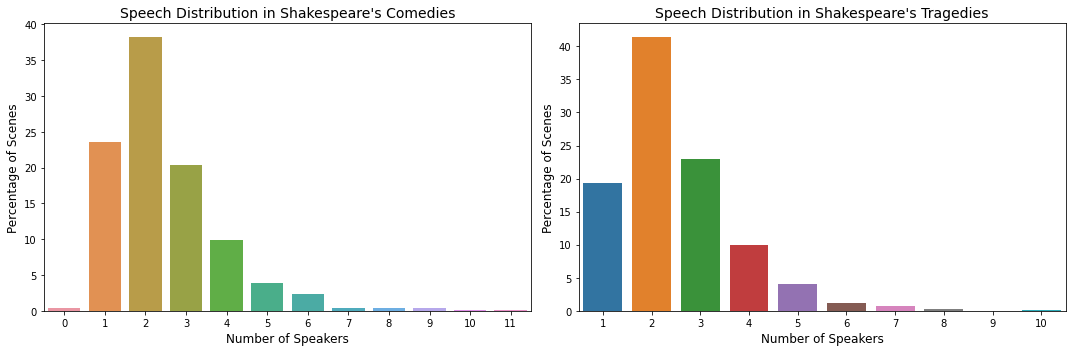

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Speech Distribution in Shakespeare\'s Comedies', fontsize=14)
sns.barplot(speech_dist_shakespeare.columns.tolist(), 
            speech_dist_shakespeare.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)

plt.subplot(122)
plt.title('Speech Distribution in Shakespeare\'s Tragedies', fontsize=14)
sns.barplot(speech_dist_tragedies.columns.tolist(), 
            speech_dist_tragedies.values.tolist()[0])
plt.xlabel('Number of Speakers', fontsize=12)
plt.ylabel('Percentage of Scenes', fontsize=12)
plt.tight_layout()
plt.show()

## Shakespeare's Tragedies (Iarkho's Data)

In [19]:
plays = ['Troilus and Cressida', 
         'Coriolanus', 
         'Titus Andronicus', 
         'Romeo and Juliet', 
         'Timon of Athens',
         'Julius Caesar', 
         'Macbeth', 
         'Hamlet', 
         'King Lear', 
         'Othello']

shakespeare_tragedies = pd.DataFrame(plays, columns=['title'])
shakespeare_tragedies['date'] = [1602, 1608, 1592, 1597, 1606, 1599, 1606, 1603, 1606, 1604]
# # this data comes from Dracor
shakespeare_tragedies['num_present_characters'] = [34, 67, 27, 38, 68, 51, 45, 38, 33, 28]
# # this data comes from Iarkho's article table VIII (page 571)
shakespeare_tragedies['mobility_coefficient'] = [122, 102, 69, 104, 83, 78, 93, 106, 105, 99]
shakespeare_tragedies['percentage_monologues'] = [28, 12, 23, 21, 18, 18, 23, 20, 12, 17]
shakespeare_tragedies['percentage_non_dialogues'] = [63, 63, 72, 48, 63, 62, 57, 52, 54, 57]
shakespeare_tragedies['percentage_polylogues'] = [35, 51, 49, 27, 45, 44, 34, 32, 42, 39]
shakespeare_tragedies = shakespeare_tragedies.sort_values(by='date')

In [20]:
shakespeare_tragedies = shakespeare_tragedies.sort_values(by='date')

In [21]:
shakespeare_tragedies.head()

,title,date,num_present_characters,mobility_coefficient,percentage_monologues,percentage_non_dialogues,percentage_polylogues
2,Titus Andronicus,1592,27,69,23,72,49
3,Romeo and Juliet,1597,38,104,21,48,27
5,Julius Caesar,1599,51,78,18,62,44
0,Troilus and Cressida,1602,34,122,28,63,35
7,Hamlet,1603,38,106,20,52,32


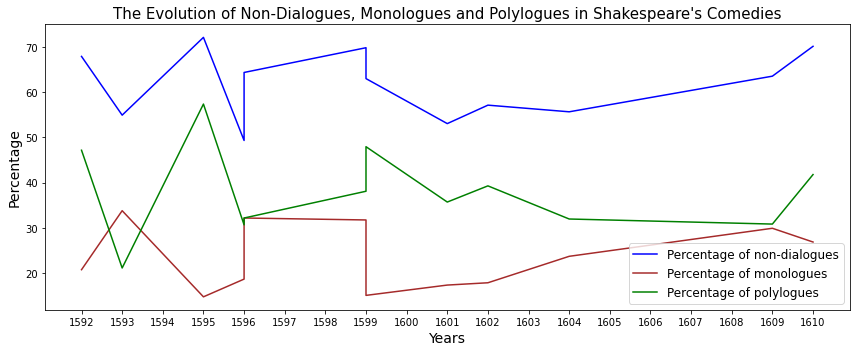

In [22]:
plt.figure(figsize=(12, 5))
plt.title('The Evolution of Non-Dialogues, Monologues and Polylogues in Shakespeare\'s Comedies', fontsize=15)
plt.plot(shakespeare_df['date'], shakespeare_df['percentage_non_dialogues'], color='b', label='Percentage of non-dialogues')
plt.plot(shakespeare_df['date'], shakespeare_df['percentage_monologues'], color='brown', label='Percentage of monologues')
plt.plot(shakespeare_df['date'], shakespeare_df['percentage_polylogues'], color='green', label='Percentage of polylogues')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.tight_layout()
plt.show()

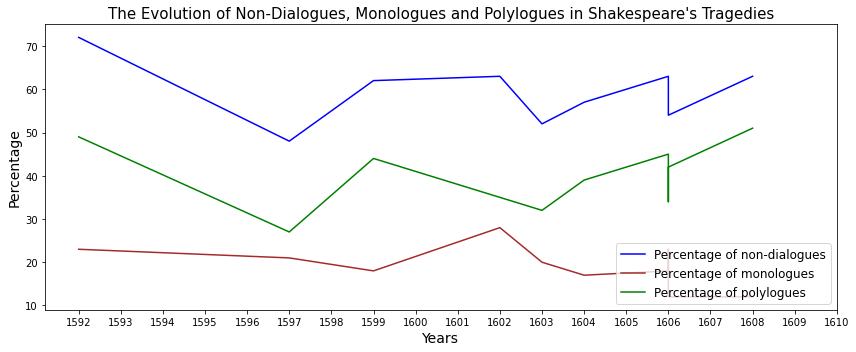

In [23]:
plt.figure(figsize=(12, 5))
plt.title('The Evolution of Non-Dialogues, Monologues and Polylogues in Shakespeare\'s Tragedies', fontsize=15)
plt.plot(shakespeare_tragedies['date'], shakespeare_tragedies['percentage_non_dialogues'], color='b', label='Percentage of non-dialogues')
plt.plot(shakespeare_tragedies['date'], shakespeare_tragedies['percentage_monologues'], color='brown', label='Percentage of monologues')
plt.plot(shakespeare_tragedies['date'], shakespeare_tragedies['percentage_polylogues'], color='green', label='Percentage of polylogues')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.tight_layout()
plt.show()

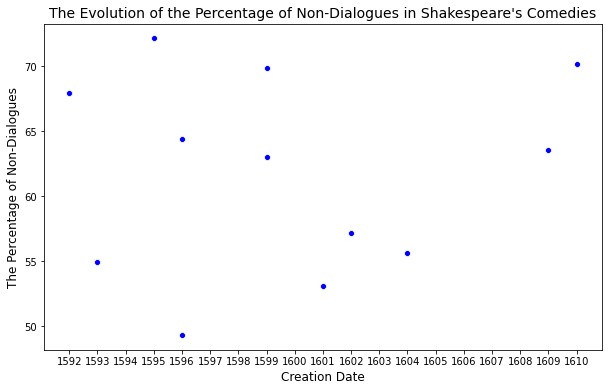

In [24]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Percentage of Non-Dialogues in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'percentage_non_dialogues', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Non-Dialogues', fontsize=12)
plt.show()

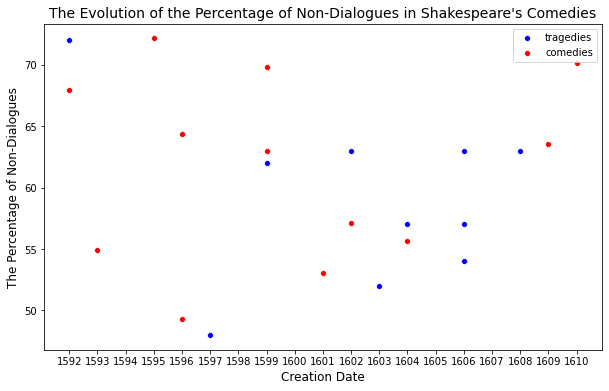

In [25]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Percentage of Non-Dialogues in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 
                'percentage_non_dialogues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot('date', 'percentage_non_dialogues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Non-Dialogues', fontsize=12)
plt.legend(loc='best')
plt.show()

In [26]:
shakespeare_df['percentage_non_dialogues'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    61.76
std      7.56
50%     63.28
min     49.33
max     72.13
Name: percentage_non_dialogues, dtype: float64

In [27]:
shakespeare_tragedies['percentage_non_dialogues'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    59.1
std      6.9
50%     59.5
min     48.0
max     72.0
Name: percentage_non_dialogues, dtype: float64

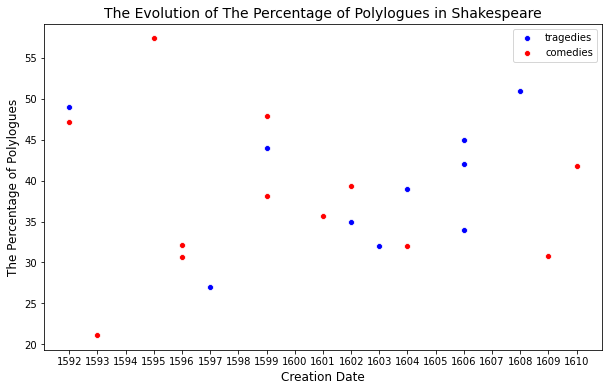

In [28]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Polylogues in Shakespeare', fontsize=14)
sns.scatterplot('date', 
                'percentage_polylogues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot('date', 
                'percentage_polylogues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Polylogues', fontsize=12)
plt.legend(loc='best')
plt.show()

In [29]:
shakespeare_df['percentage_polylogues'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    37.85
std      9.72
50%     36.90
min     21.13
max     57.38
Name: percentage_polylogues, dtype: float64

In [30]:
shakespeare_tragedies['percentage_polylogues'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    39.80
std      7.76
50%     40.50
min     27.00
max     51.00
Name: percentage_polylogues, dtype: float64

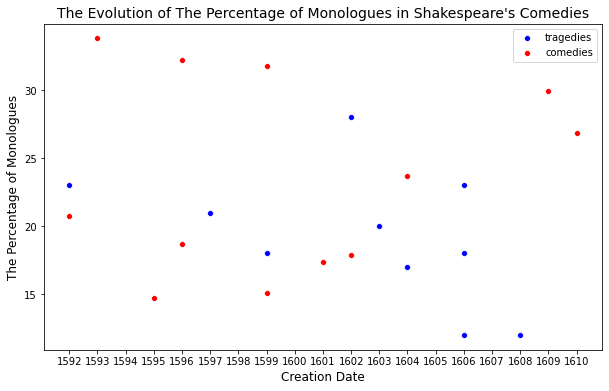

In [31]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Monologues in Shakespeare\'s Comedies', fontsize=14)
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

sns.scatterplot('date', 
                'percentage_monologues', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot('date', 
                'percentage_monologues', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Monologues', fontsize=12)
plt.legend(loc='best')
plt.show()

In [32]:
shakespeare_df['percentage_monologues'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    23.56
std      7.07
50%     22.23
min     14.75
max     33.80
Name: percentage_monologues, dtype: float64

In [33]:
shakespeare_df[shakespeare_df['percentage_monologues'] > 30][['title', 'last_name', 'date', 'percentage_monologues']]

,title,last_name,date,percentage_monologues
1,The Two Gentlemen of Verona,Shakespeare,1593,33.80
4,A Midsummer Night's Dream,Shakespeare,1596,32.18
5,The Tempest,Shakespeare,1599,31.75


## The Number of Dramatic Characters

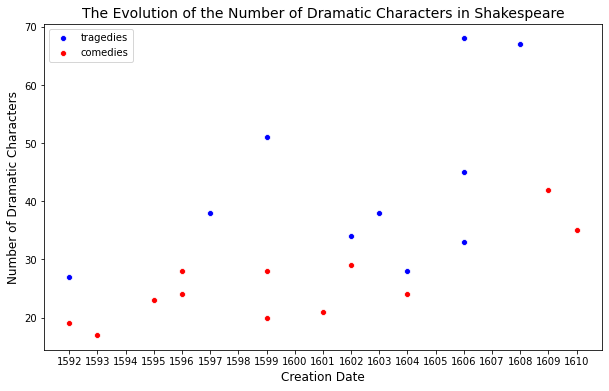

In [34]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Number of Dramatic Characters in Shakespeare', fontsize=14)
sns.scatterplot('date', 
                'num_present_characters', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')

sns.scatterplot('date', 'num_present_characters', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Number of Dramatic Characters', fontsize=12)
plt.legend()
plt.show()

In [35]:
shakespeare_tragedies[shakespeare_tragedies['num_present_characters'] > 50]

,title,date,num_present_characters,mobility_coefficient,percentage_monologues,percentage_non_dialogues,percentage_polylogues
5,Julius Caesar,1599,51,78,18,62,44
4,Timon of Athens,1606,68,83,18,63,45
1,Coriolanus,1608,67,102,12,63,51


In [36]:
shakespeare_df['num_present_characters'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    25.83
std      7.15
50%     24.00
min     17.00
max     42.00
Name: num_present_characters, dtype: float64

In [37]:
shakespeare_tragedies['num_present_characters'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    42.90
std     14.84
50%     38.00
min     27.00
max     68.00
Name: num_present_characters, dtype: float64

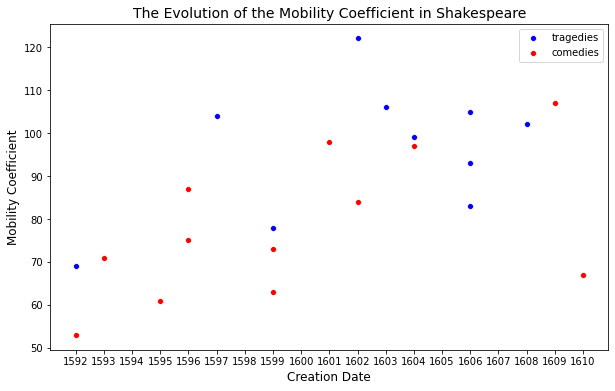

In [38]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of the Mobility Coefficient in Shakespeare', fontsize=14)
sns.scatterplot('date', 
                'mobility_coefficient', 
                data=shakespeare_tragedies, 
                color='blue', 
                label='tragedies')
sns.scatterplot('date', 'mobility_coefficient', 
                data=shakespeare_df, 
                color='red', 
                label='comedies')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])

plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('Mobility Coefficient', fontsize=12)
plt.legend()
plt.show()

In [39]:
shakespeare_df['mobility_coefficient'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean     78.00
std      16.68
50%      74.00
min      53.00
max     107.00
Name: mobility_coefficient, dtype: float64

In [40]:
shakespeare_tragedies['mobility_coefficient'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean     96.10
std      15.62
50%     100.50
min      69.00
max     122.00
Name: mobility_coefficient, dtype: float64

## Other Features

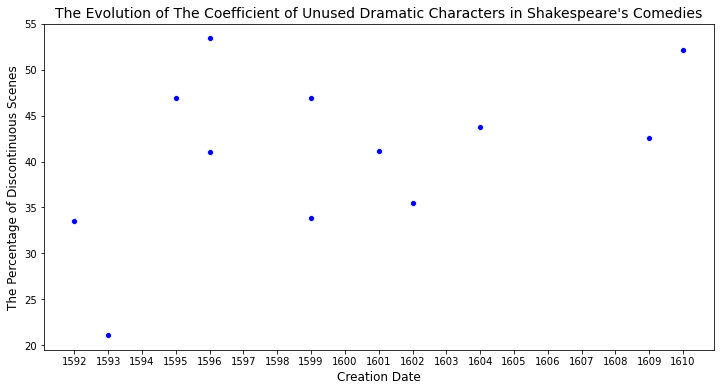

In [41]:
plt.figure(figsize=(12, 6))
plt.title('The Evolution of The Coefficient of Unused Dramatic Characters in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'coefficient_unused', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

In [42]:
shakespeare_df['coefficient_unused'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    40.99
std      9.01
50%     41.90
min     21.11
max     53.40
Name: coefficient_unused, dtype: float64

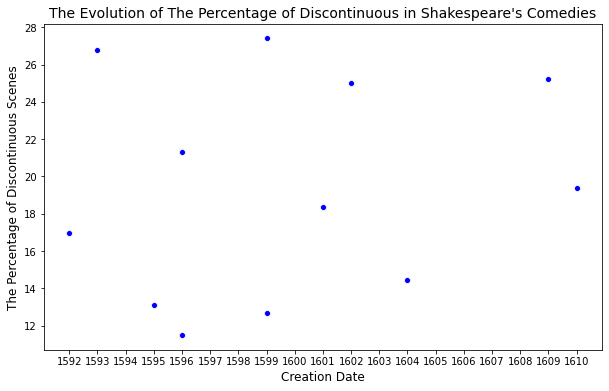

In [43]:
plt.figure(figsize=(10, 6))
plt.title('The Evolution of The Percentage of Discontinuous in Shakespeare\'s Comedies', fontsize=14)
sns.scatterplot('date', 'discontinuous_scenes', data=shakespeare_df, color='blue')
plt.xticks([year for year in range(shakespeare_df.date.min(), 
                                   shakespeare_df.date.max()+1)])
plt.xlabel('Creation Date', fontsize=12)
plt.ylabel('The Percentage of Discontinuous Scenes', fontsize=12)
plt.show()

In [44]:
shakespeare_df['discontinuous_scenes'].describe()[['mean', 'std', '50%','min', 'max']].round(2)

mean    19.35
std      5.77
50%     18.88
min     11.49
max     27.40
Name: discontinuous_scenes, dtype: float64

In [45]:
14 + (51-14) + (48-14)

85

In [46]:
85 - 69

16

In [47]:
round(16 / 85, 2)

0.19

In [48]:
18 + (56 - 18) + (57 - 18)

95

In [49]:
95 - 78

17

In [50]:
round(17 / 95, 2)

0.18

In [51]:
28 + (76 - 28) + (67-28)

115

In [52]:
115 - 93

22

In [53]:
round(22 / 115, 2)

0.19

In [54]:
15 + (65 - 15) + (67 - 15)

117

In [55]:
117 - 99

18

In [56]:
18 / 117

0.15384615384615385